<a href="https://colab.research.google.com/github/pkboom/introduction_to_ml_with_python/blob/master/Titanic_LeeYoohan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Basic setting
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings  # ignore warnings
import missingno as msno

plt.style.use("seaborn-v0_8")
# print(plt.style.available)
sns.set(font_scale=1.5)
sns.set_palette("pastel")
warnings.filterwarnings("ignore")

%load_ext lab_black
%matplotlib inline

# 1. Check Dataset

In [1]:
df_train = pd.read_csv("data/Titanic/train.csv")
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df_test = pd.read_csv("data/Titanic/test.csv")
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## 0. Data Dictionary

|변수(feature, variable)|정의|설명|타입|
|:----|:----|:----|:----|
|      survival|생존여부|target label 임. 1, 0 으로 표현됨|integer|
|       Pclass|티켓의 클래스|1 = 1st, 2 = 2nd, 3 = 3rd 클래스로 나뉘며 categorical feature|integer|
|         sex|성별|male, female 로 구분되며 binary|string|
|         Age|나이|continuous|integer|
|        sibSp|함께 탑승한 형제와 배우자의 수|quantitative|integer|
|        parch|함께 탑승한 부모, 아이의 수|quantitative|integer|
|       ticket|티켓 번호|alphabat + integer|string|
|        fare|탑승료|continuous|float|
|        cabin|객실 번호|alphabat + integer|string|
|       embared|탑승 항구|C = Cherbourg, Q = Queenstown, S = Southampton|string|


In [3]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## 1.1 Null Data Check

In [5]:
df_train.agg(lambda x: x.isnull().sum() / x.shape[0])

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [6]:
for col in df_train.columns:
    print(
        "colum: {:<11} % of NaN: {:.2f}%".format(
            col, 100 * df_train[col].isnull().sum() / df_train[col].shape[0]
        )
    )

colum: PassengerId % of NaN: 0.00%
colum: Survived    % of NaN: 0.00%
colum: Pclass      % of NaN: 0.00%
colum: Name        % of NaN: 0.00%
colum: Sex         % of NaN: 0.00%
colum: Age         % of NaN: 19.87%
colum: SibSp       % of NaN: 0.00%
colum: Parch       % of NaN: 0.00%
colum: Ticket      % of NaN: 0.00%
colum: Fare        % of NaN: 0.00%
colum: Cabin       % of NaN: 77.10%
colum: Embarked    % of NaN: 0.22%


In [7]:
for col in df_test.columns:
    print(
        "colum: {:<11} % of NaN: {:.2f}%".format(
            col, 100 * df_test[col].isnull().sum() / df_test[col].shape[0]
        )
    )

colum: PassengerId % of NaN: 0.00%
colum: Pclass      % of NaN: 0.00%
colum: Name        % of NaN: 0.00%
colum: Sex         % of NaN: 0.00%
colum: Age         % of NaN: 20.57%
colum: SibSp       % of NaN: 0.00%
colum: Parch       % of NaN: 0.00%
colum: Ticket      % of NaN: 0.00%
colum: Fare        % of NaN: 0.24%
colum: Cabin       % of NaN: 78.23%
colum: Embarked    % of NaN: 0.00%


In [8]:
# msno.matrix(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

<Axes: >

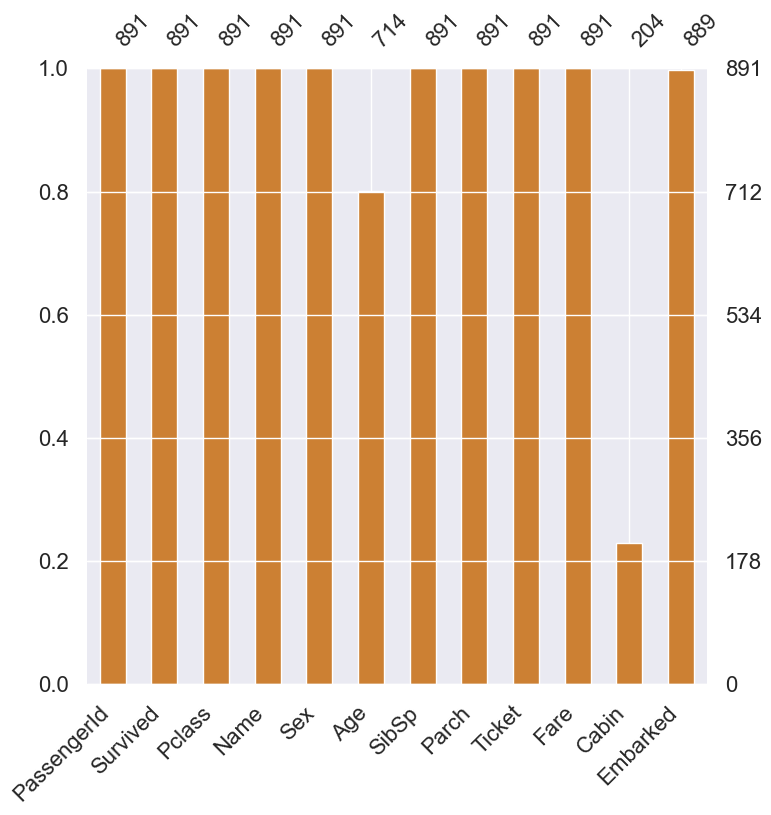

In [9]:
msno.bar(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

<Axes: >

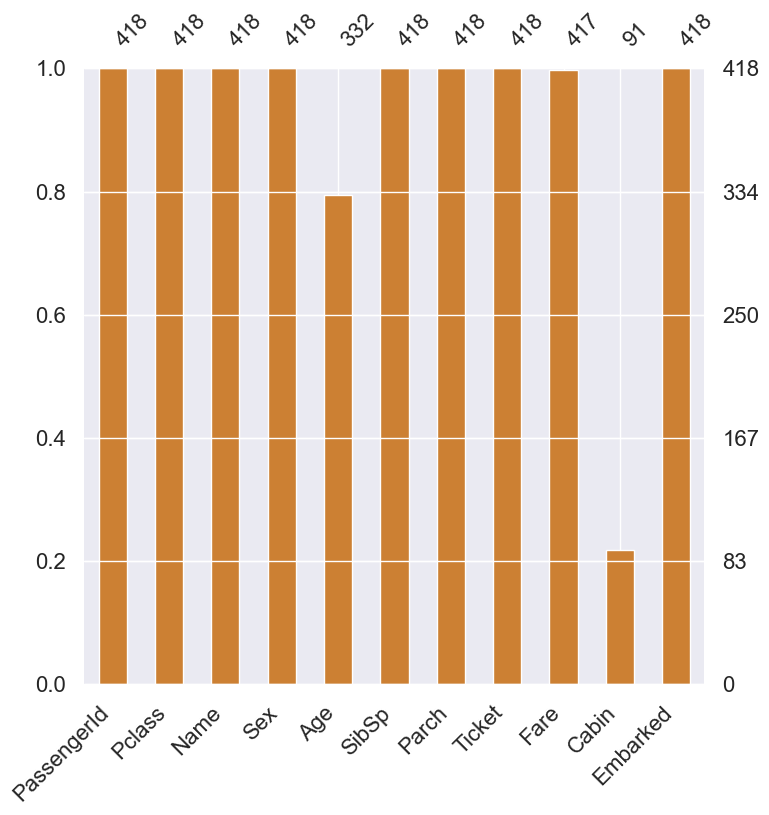

In [10]:
# msno.bar(df=df_test.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))
msno.bar(df=df_test, figsize=(8, 8), color=(0.8, 0.5, 0.2))

## 1.2 Check Target Label

target label 이 어떤 distribution 을 가지고 있는지 확인해봐야 합니다.

지금 같은 binary classification 문제의 경우에서, 1과 0의 분포가 어떠냐에 따라 모델의 평가 방법이 달라 질 수 있습니다.

0    549
1    342
Name: Survived, dtype: int64

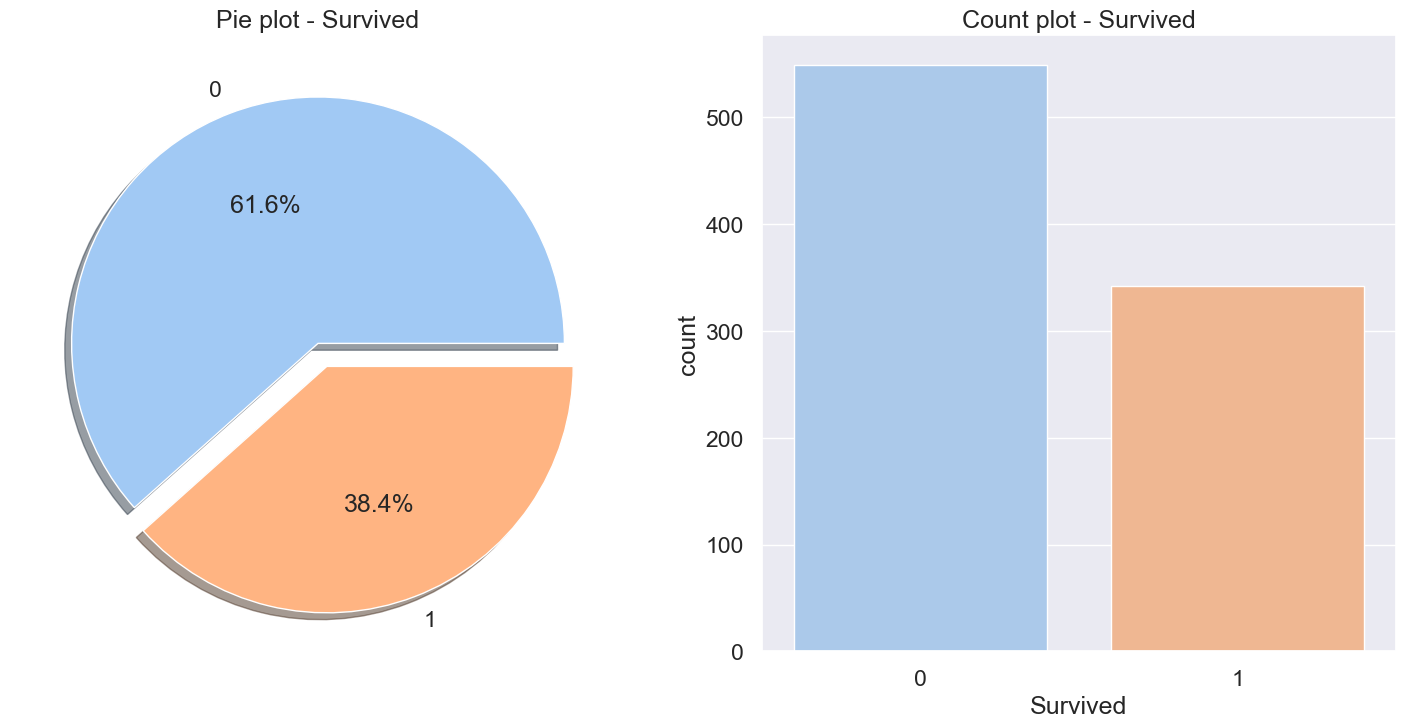

In [11]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

df_train["Survived"].value_counts().plot.pie(
    explode=[0, 0.1], autopct="%1.1f%%", ax=ax1, shadow=True
)
ax1.set_title("Pie plot - Survived")
ax1.set_ylabel("")
sns.countplot(x=df_train["Survived"], ax=ax2)
ax2.set_title("Count plot - Survived")
df_train["Survived"].value_counts()

# 2. Exploratory data analysis
데이터 안에 숨겨진 사실을 찾기 위해선 적절한 시각화가 필요합니다.

## 2.1 Pclass

In [12]:
df_train[["Pclass", "Survived"]].groupby(["Pclass"], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [13]:
df_train[["Pclass", "Survived"]].groupby(["Pclass"], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [14]:
df_train[["Pclass", "Survived"]].groupby(["Pclass"], as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [15]:
pd.crosstab(df_train.Pclass, df_train.Survived, margins=True).style.background_gradient(
    cmap="summer_r"
)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


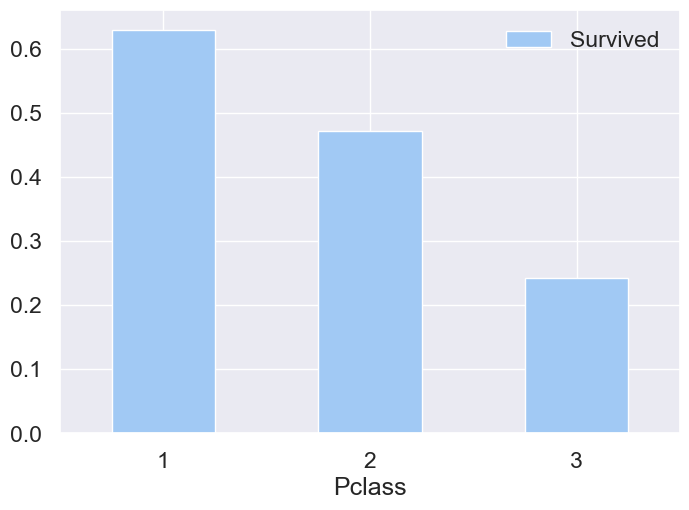

In [16]:
df_train[["Pclass", "Survived"]].groupby(["Pclass"], as_index=True).mean().sort_values(
    by="Survived", ascending=False
).plot(rot=0, kind="bar")
df_train[["Pclass", "Survived"]].groupby(["Pclass"], as_index=True).mean()

Text(0.5, 1.02, 'Pclass: Survived vs Dead')

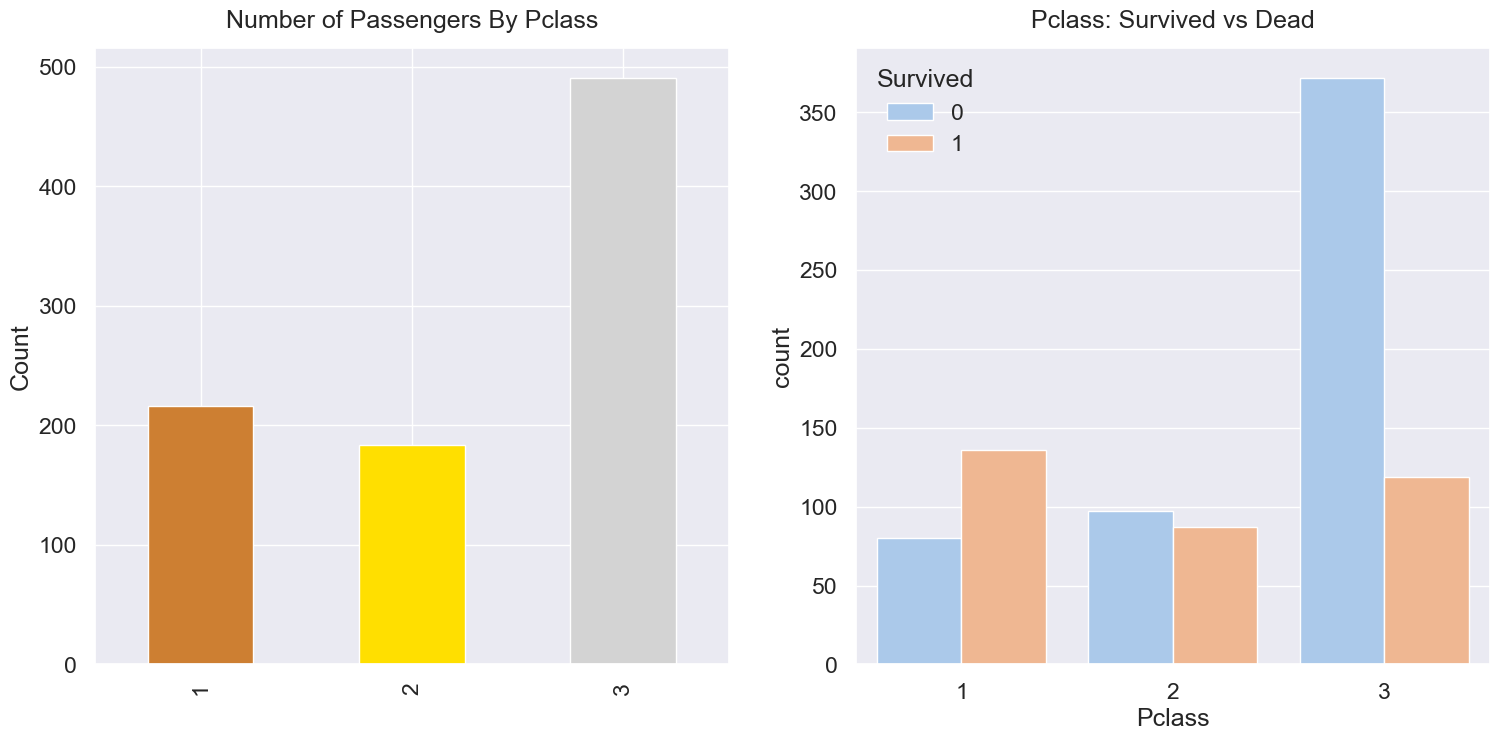

In [17]:
y_position = 1.02
f, (ax0, ax1) = plt.subplots(1, 2, figsize=(18, 8))
df_train.Pclass.value_counts().sort_index().plot.bar(
    color=["#CD7F32", "#FFDF00", "#D3D3D3"], ax=ax0
)
ax0.set_title("Number of Passengers By Pclass", y=y_position)
ax0.set_ylabel("Count")
sns.countplot(data=df_train, x="Pclass", hue="Survived", ax=ax1)
ax1.set_title("Pclass: Survived vs Dead", y=y_position)

Text(0.5, 1.0, 'Sex: Survived vs Dead')

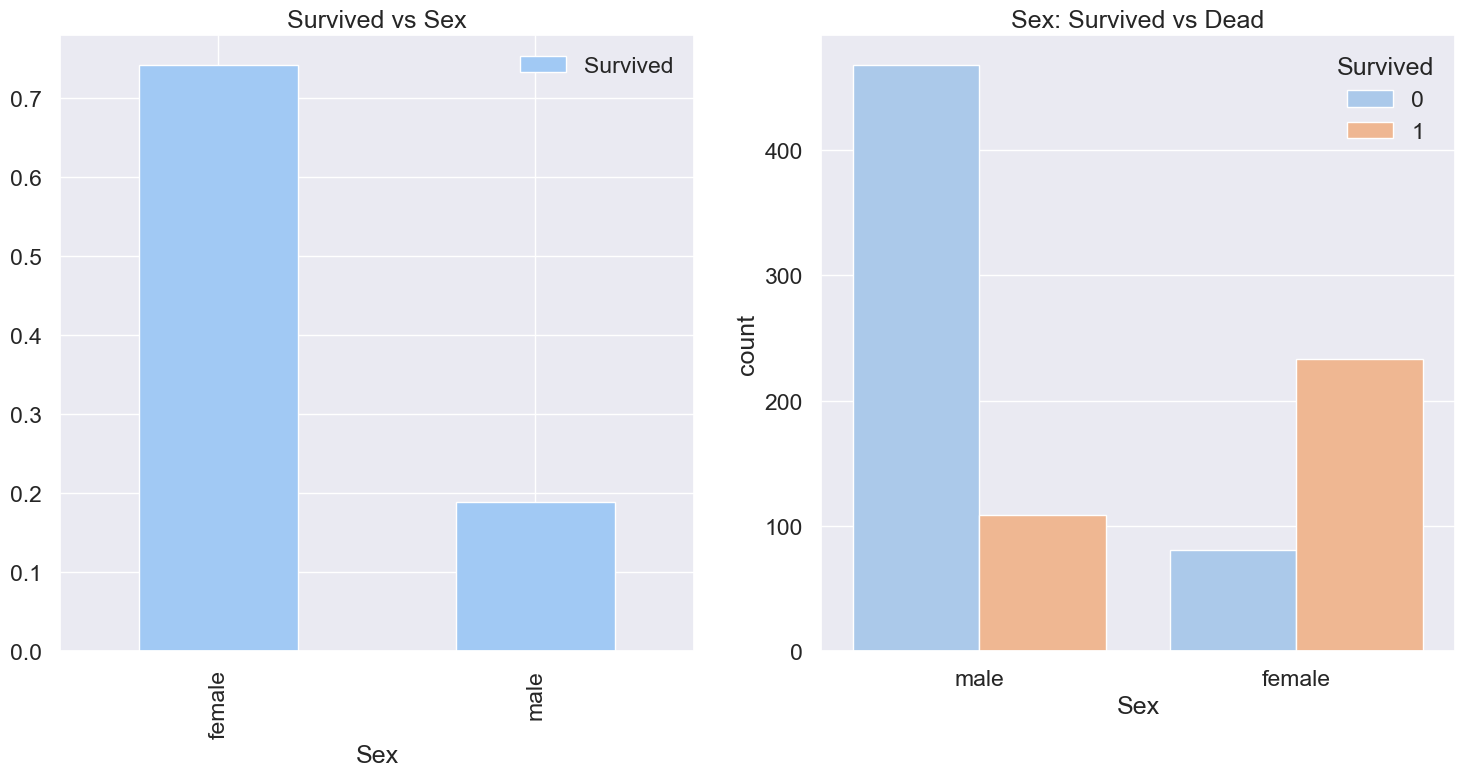

In [18]:
f, (ax0, ax1) = plt.subplots(1, 2, figsize=(18, 8))
df_train[["Sex", "Survived"]].groupby(["Sex"], as_index=True).mean().plot.bar(ax=ax0)
ax0.set_title("Survived vs Sex")
sns.countplot(data=df_train, x="Sex", hue="Survived")
ax1.set_title("Sex: Survived vs Dead")

In [19]:
df_train[["Sex", "Survived"]].groupby(["Sex"]).mean().sort_values(
    by="Survived", ascending=False
)

,Survived
Sex,
female,0.742038
male,0.188908


In [20]:
pd.crosstab(df_train.Sex, df_train.Survived, margins=True).style.background_gradient(
    cmap="summer_r"
)

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


## 2.3 Relationship between Sex and Pclass
Sex, Pclass 두가지에 관하여 생존이 어떻게 달라지는 지 확인해 봅시다

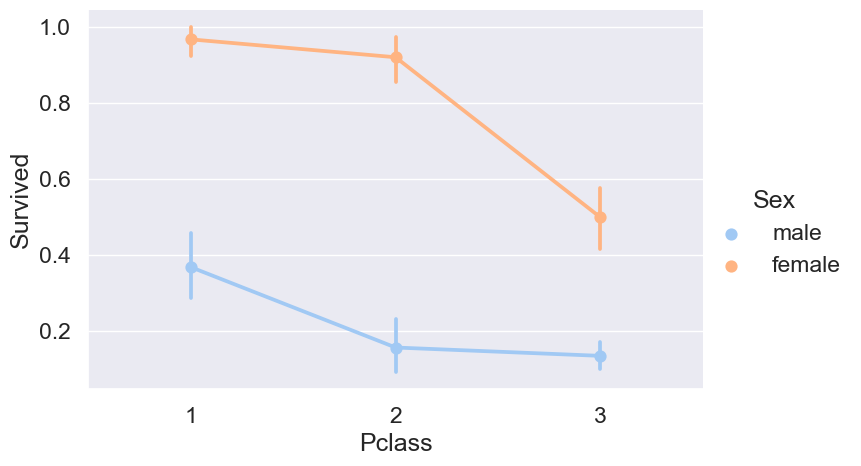

In [21]:
sns.catplot(
    data=df_train, x="Pclass", y="Survived", hue="Sex", kind="point", aspect=1.5
)

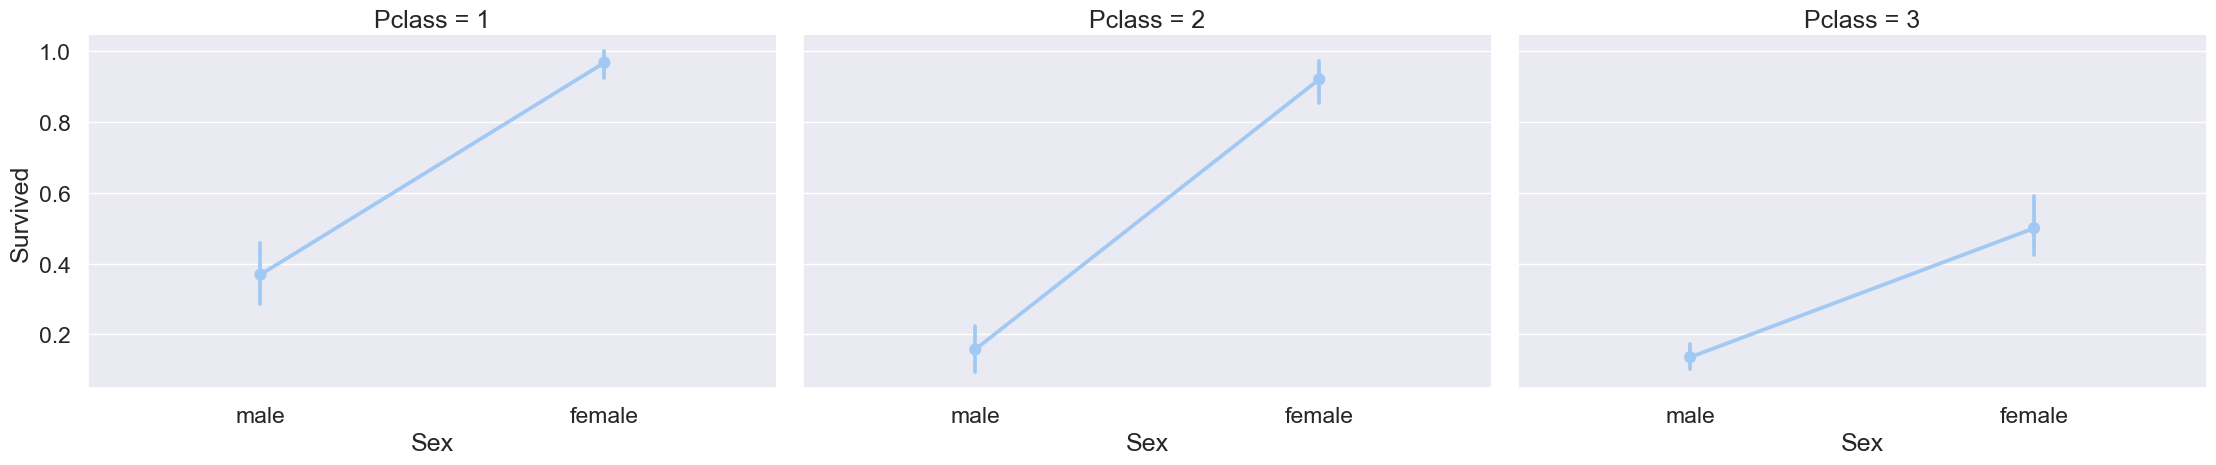

In [22]:
sns.catplot(
    data=df_train,
    x="Sex",
    y="Survived",
    kind="point",
    aspect=1.5,
    col="Pclass",
)

## 2.4 Age

In [23]:
print("max of age: {:.1f} years".format(df_train.Age.max()))
print("min of age: {:.1f} years".format(df_train.Age.min()))
print("mean of age: {:.1f} years".format(df_train.Age.mean()))

max of age: 80.0 years
min of age: 0.4 years
mean of age: 29.7 years


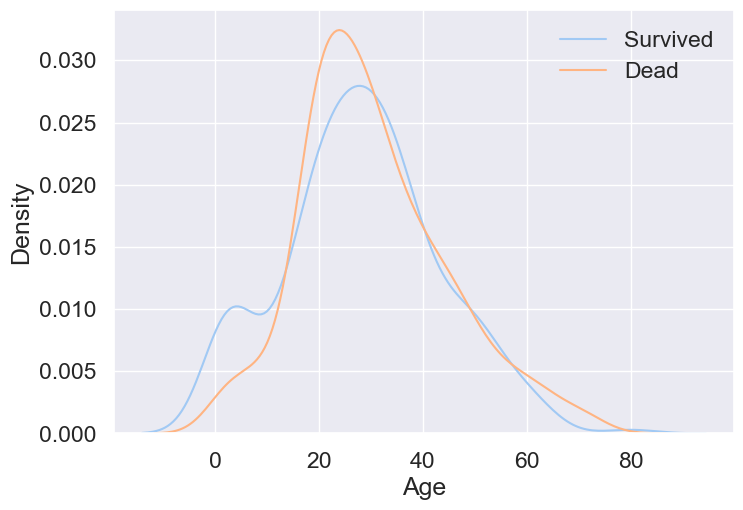

In [24]:
ax = plt.gca()
sns.kdeplot(df_train[df_train.Survived == 1].Age, ax=ax)
sns.kdeplot(df_train[df_train.Survived == 0].Age, ax=ax)
plt.legend(["Survived", "Dead"])

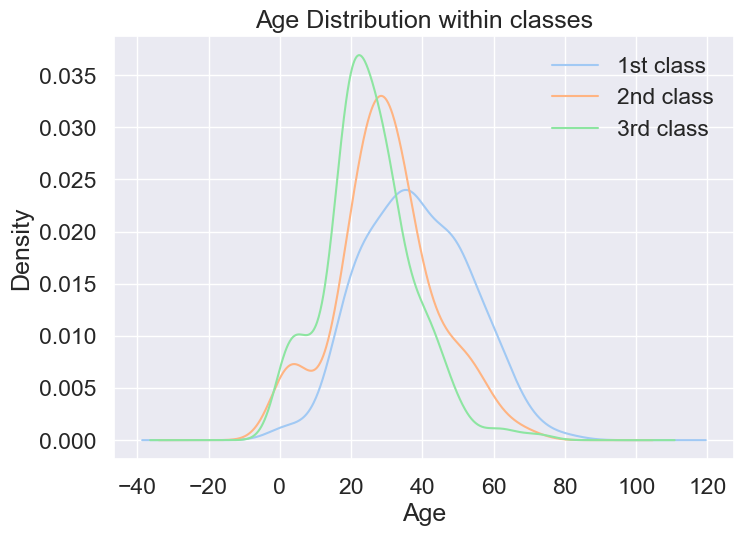

In [25]:
# Age distribution within classes
df_train[df_train.Pclass == 1].Age.plot(kind="kde")
df_train[df_train.Pclass == 2].Age.plot(kind="kde")
df_train[df_train.Pclass == 3].Age.plot(kind="kde")
plt.xlabel("Age")
plt.title("Age Distribution within classes")
plt.legend(["1st class", "2nd class", "3rd class"])

나이대가 변하면서 생존률이 어떻게 되는 지 보려고 합니다.

나이범위를 점점 넓혀가며, 생존률이 어떻게 되는지 한번 봅시다.

[1.0, 0.8571428571428571, 0.625, 0.6666666666666666, 0.675]

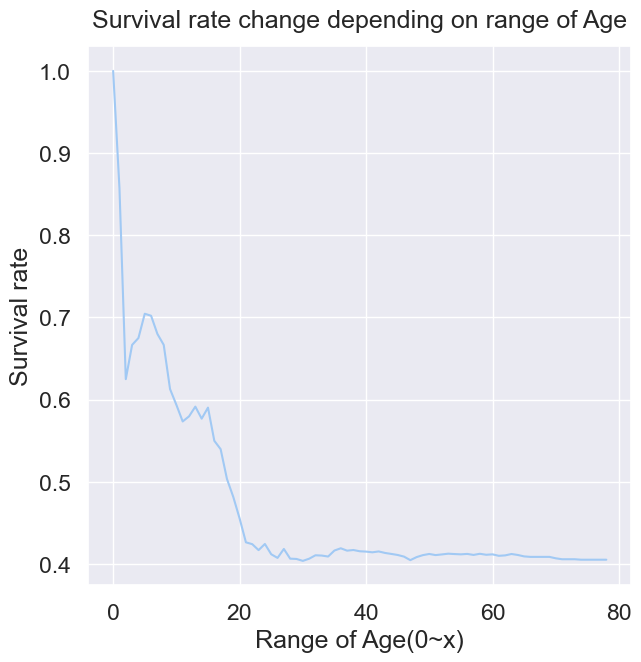

In [26]:
cummulate_survival_ratio = []
for i in range(1, 80):
    cummulate_survival_ratio.append(df_train[df_train.Age < i].Survived.mean())
plt.figure(figsize=(7, 7))
plt.plot(cummulate_survival_ratio)
plt.title("Survival rate change depending on range of Age", y=1.02)
plt.xlabel("Range of Age(0~x)")
plt.ylabel("Survival rate")
cummulate_survival_ratio[:5]

(array([ 64., 115., 230., 155.,  86.,  42.,  17.,   5.]),
 array([ 0.42  , 10.3675, 20.315 , 30.2625, 40.21  , 50.1575, 60.105 ,
        70.0525, 80.    ]),
 <BarContainer object of 8 artists>)

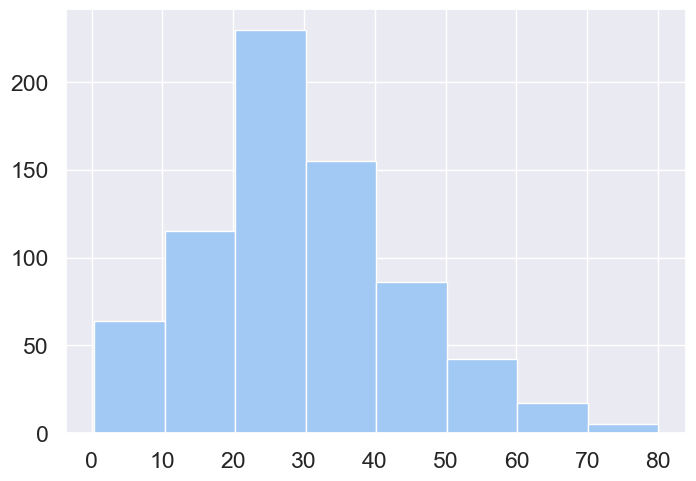

In [27]:
plt.hist(df_train.Age, bins=8)

In [28]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [29]:
df_train.sample(n=3, replace=True, random_state=2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
168,169,0,1,"Baumann, Mr. John D",male,NaN,0,0,PC 17318,25.9250,NaN,S
527,528,0,1,"Farthing, Mr. John",male,NaN,0,0,PC 17483,221.7792,C95,S
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C


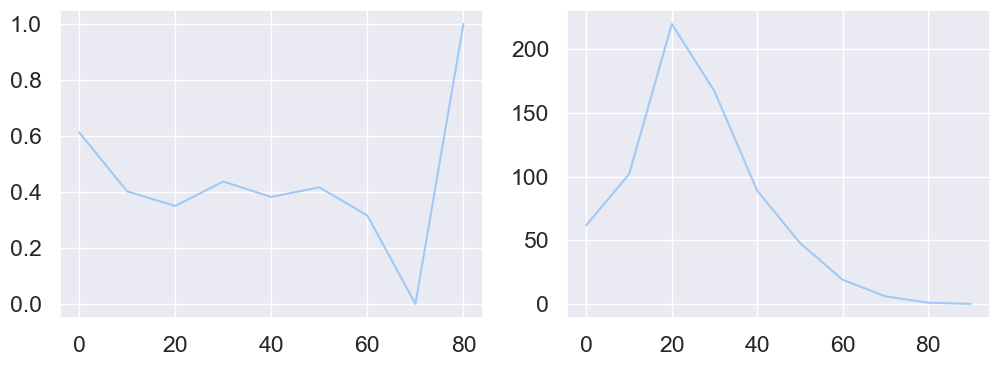

In [30]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
avg_age_survived = []
count_age = []
for i in range(0, 100, 10):
    avg_age_survived.append(df_train[df_train.Age.between(i, i + 9)].Survived.mean())
    count_age.append(df_train[df_train.Age.between(i, i + 9)].Age.count())
ax1.plot(range(0, 100, 10), avg_age_survived)
ax2.plot(range(0, 100, 10), count_age)
plt.show()

## 2.5 Pclass, Sex, Age
Relation among Sex, Pclass, Age, Survived. 

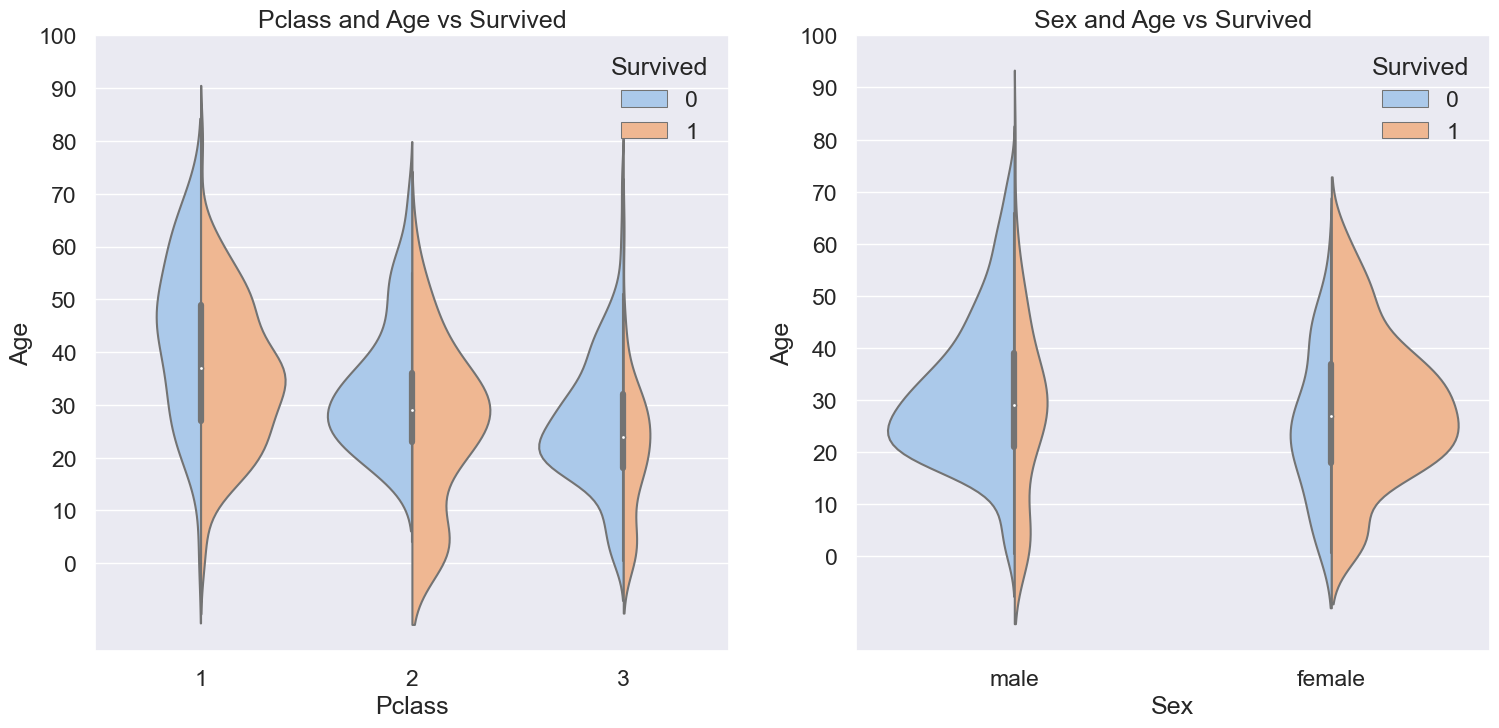

In [31]:
# x 축은 우리가 나눠서 보고싶어하는 case(여기선 Pclass, Sex) 를 나타내고, y 축은 보고 싶어하는 distribution(Age) 입니다.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))
sns.violinplot(
    data=df_train,
    x="Pclass",
    y="Age",
    hue="Survived",
    ax=ax1,
    scale="count",
    split=True,
)
ax1.set_title("Pclass and Age vs Survived")
ax1.set_yticks(range(0, 110, 10))
sns.violinplot(
    data=df_train,
    x="Sex",
    y="Age",
    hue="Survived",
    ax=ax2,
    scale="count",
    split=True,
)
ax2.set_title("Sex and Age vs Survived")
ax2.set_yticks(range(0, 110, 10))
plt.show()

## 2.5 Embarked

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


<Figure size 700x700 with 0 Axes>

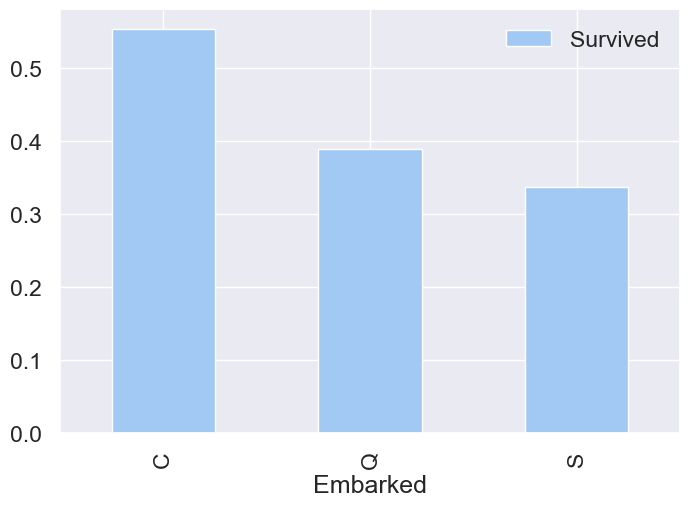

In [32]:
plt.figure(figsize=(7, 7))
df_train[["Embarked", "Survived"]].groupby("Embarked").mean().sort_values(
    by="Survived", ascending=False
).plot.bar()
df_train[["Embarked", "Survived"]].groupby("Embarked").mean()

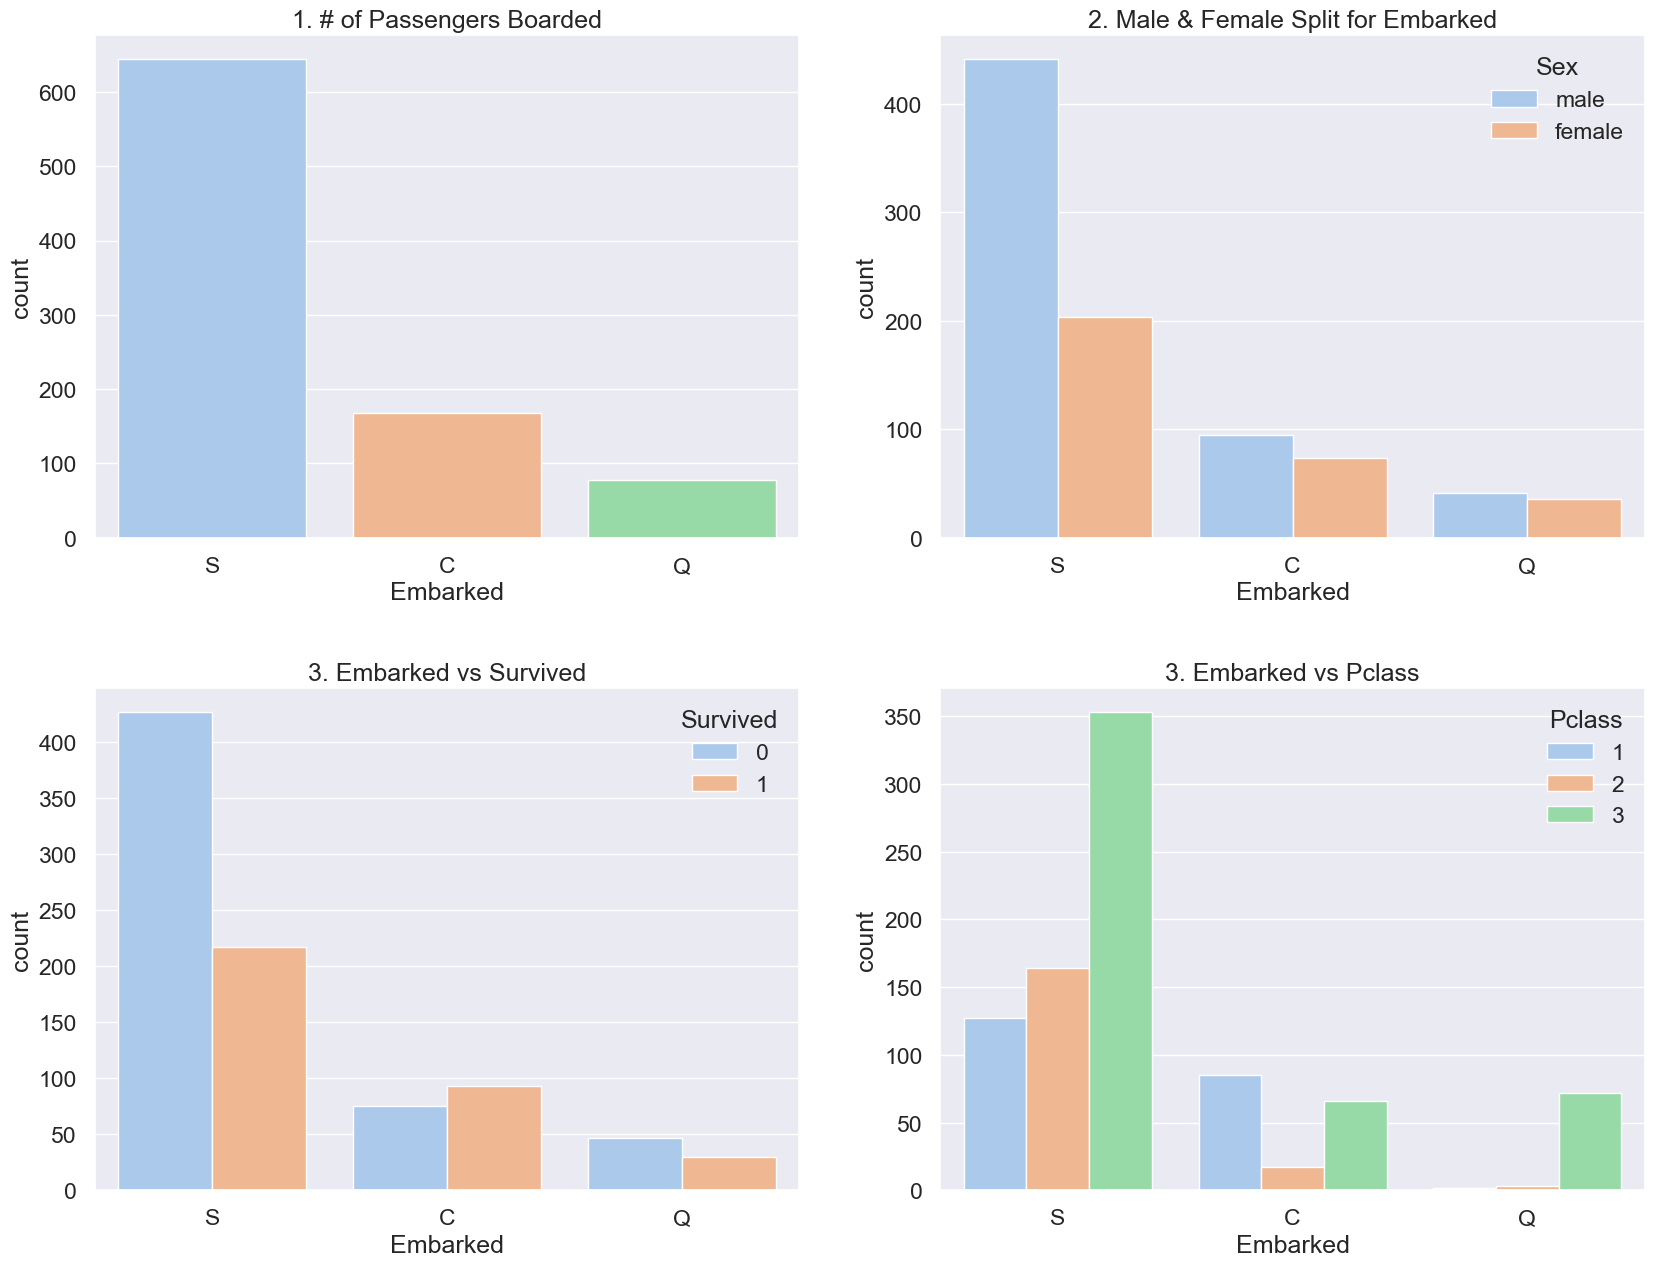

In [33]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 15))
sns.countplot(df_train, x="Embarked", ax=ax1)
ax1.set_title("1. # of Passengers Boarded")
sns.countplot(df_train, x="Embarked", hue="Sex", ax=ax2)
ax2.set_title("2. Male & Female Split for Embarked")
sns.countplot(df_train, x="Embarked", hue="Survived", ax=ax3)
ax3.set_title("3. Embarked vs Survived")
sns.countplot(df_train, x="Embarked", hue="Pclass", ax=ax4)
ax4.set_title("3. Embarked vs Pclass")
plt.subplots_adjust(wspace=0.2, hspace=0.3)

## 2.7 Family - SibSp(형제 자매) + Parch(부모, 자녀)
SibSp와 Parch를 합하면 Family 가 될 것입니다. Family 로 합쳐서 분석해봅시다

In [34]:
df_train["familySize"] = df_train.SibSp + df_train.Parch + 1
df_test["familySize"] = df_test.SibSp + df_test.Parch + 1

In [35]:
print("Max of Family size: ", df_train.familySize.max())
print("Min of Family size: ", df_train.familySize.min())

Max of Family size:  11
Min of Family size:  1


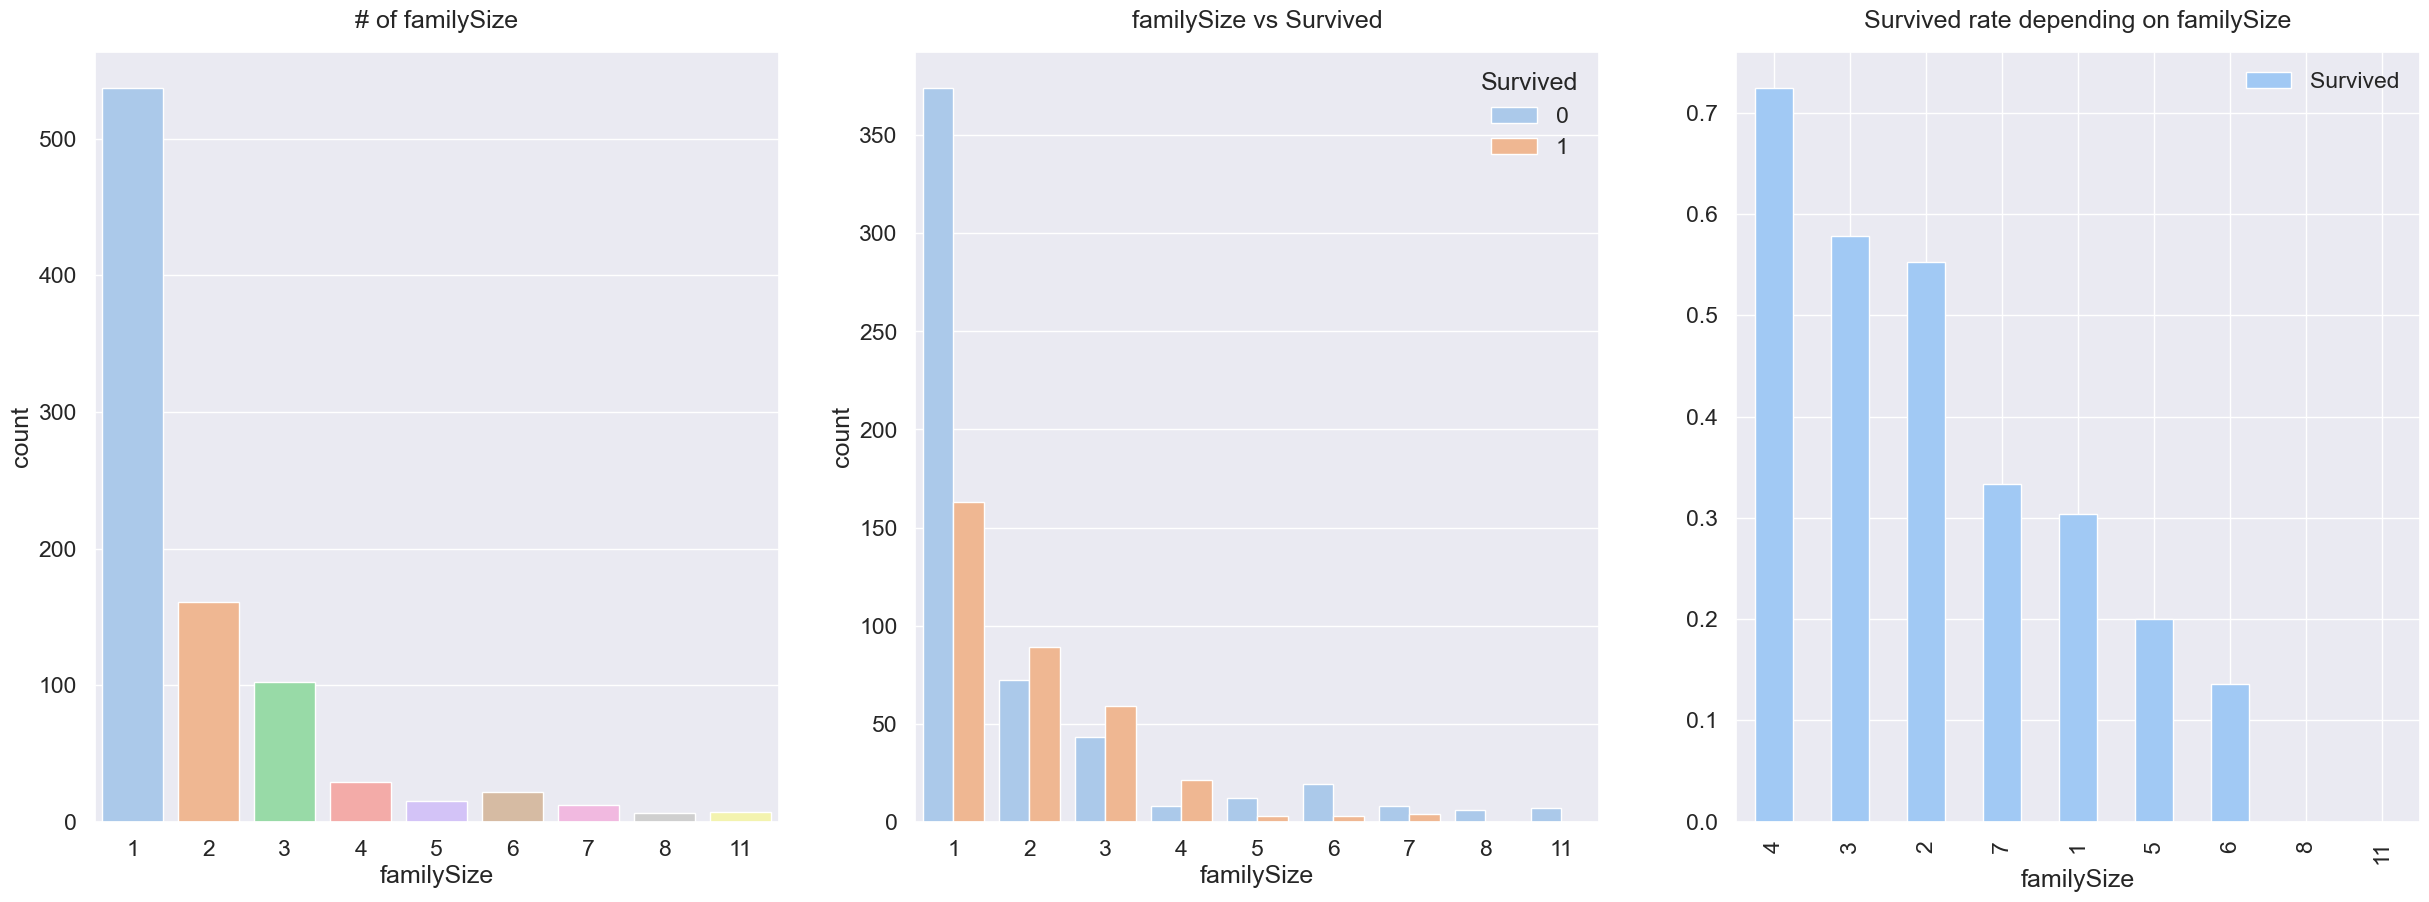

In [36]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30, 10))
sns.countplot(df_train, x="familySize", ax=ax1)
ax1.set_title("# of familySize", y=1.02)
sns.countplot(df_train, x="familySize", hue="Survived", ax=ax2)
ax2.set_title("familySize vs Survived", y=1.02)
df_train[["familySize", "Survived"]].groupby("familySize").mean().sort_values(
    by="Survived", ascending=False
).plot.bar(ax=ax3)
ax3.set_title("Survived rate depending on familySize", y=1.02)
plt.show()

## 2.8 Fare
Fare 는 탑승요금이며, continous feature 입니다.

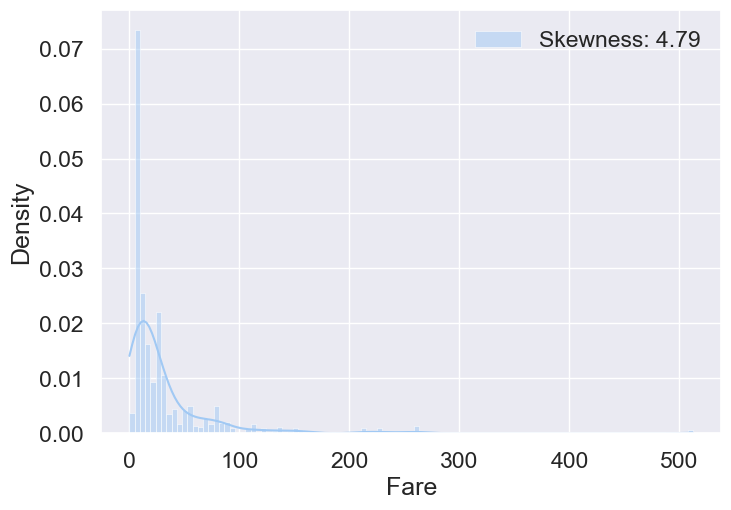

In [37]:
sns.histplot(
    df_train,
    x="Fare",
    label="Skewness: {:.2f}".format(df_train.Fare.skew()),
    kde=True,
    stat="density",
)
plt.legend(loc="best")

In [38]:
df_train.Fare = df_train.Fare.map(lambda i: np.log(i) if i > 0 else 0)
df_test.Fare = df_test.Fare.map(lambda i: np.log(i) if i > 0 else 0)

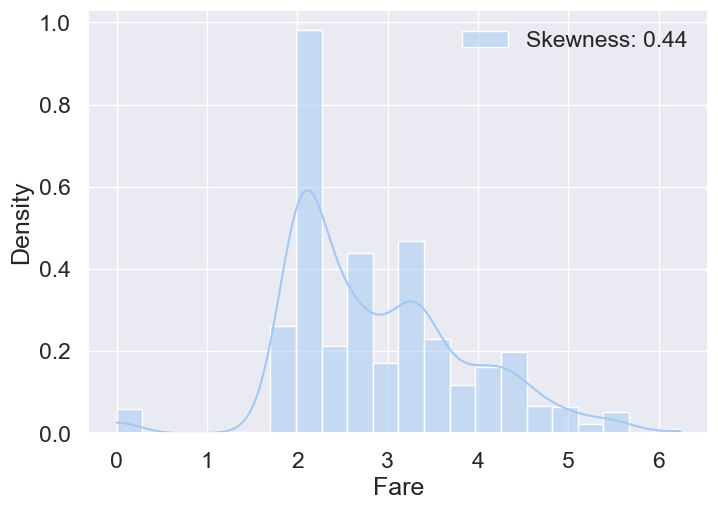

In [39]:
sns.histplot(
    df_train,
    x="Fare",
    label="Skewness: {:.2f}".format(df_train.Fare.skew()),
    kde=True,
    stat="density",
)
plt.legend(loc="best")

## 2.9 Cabin

NaN 이 대략 80% 이므로, 생존에 영향을 미칠 중요한 정보를 얻어내기가 쉽지는 않습니다. Excluded


In [40]:
df_train.Cabin.isnull().mean()

0.7710437710437711

## 2.10 Ticket

In [41]:
df_train.Ticket.value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64